# Building The Model
<br>

## Vocabulary Creation 


In [1]:
# imports
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization

In [2]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK
string length :  52


### Preprocessing

In [3]:
# convert all letters to lower case
text_lowercase = text.lower()
print(text_lowercase)
print('string length : ',len(text_lowercase))

# some regex to tokenize the string to words and return them in a list
words = re.findall(r'\w+', text_lowercase)
print(words)
print('count : ',len(words))

red pink pink blue blue yellow orange blue blue pink
string length :  52
['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink']
count :  10


### Create Vocabulary
Option 1 : A set of distinct words from the text

In [4]:
# create vocab
vocab = set(words)
print(vocab)
print('count : ',len(vocab))

{'blue', 'pink', 'yellow', 'red', 'orange'}
count :  5


### Add Information with Word Counts
Option 2 : Two alternatives for including the word count as well

In [5]:
# create vocab including word count
counts_a = dict()
for w in words:
    counts_a[w] = counts_a.get(w,0)+1
print(counts_a)
print('count : ',len(counts_a))

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
count :  5


In [6]:
# create vocab including word count using collections.Counter
counts_b = dict()
counts_b = Counter(words)
print(counts_b)
print('count : ',len(counts_b))

Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5


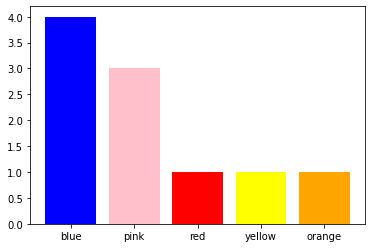

In [7]:
# barchart of sorted word counts
d = {'blue': counts_b['blue'], 'pink': counts_b['pink'], 'red': counts_b['red'], 'yellow': counts_b['yellow'], 'orange': counts_b['orange']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [9]:
print('counts_b : ', counts_b)
pinkVal=counts_b.get('pink')
redVal=counts_b.get('red')
counts_b['magenta']=pinkVal-1 #added between Pink and Red

assert counts_b.get('magenta') > redVal
print('counts_b : ', counts_b)
print('count : ', len(counts_b))

counts_b :  Counter({'blue': 4, 'pink': 3, 'magenta': 2, 'red': 1, 'yellow': 1, 'orange': 1})
counts_b :  Counter({'blue': 4, 'pink': 3, 'magenta': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count :  6


# Candidates from String Edits

In [10]:
# data
word = 'dearz' # 🦌

### Splits
Find all the ways you can split a word into 2 parts !

In [11]:
# splits with a loop
splits_a = []
for i in range(len(word)+1):
    splits_a.append([word[:i],word[i:]])

for i in splits_a:
    print(i)

['', 'dearz']
['d', 'earz']
['de', 'arz']
['dea', 'rz']
['dear', 'z']
['dearz', '']


In [12]:
# same splits, done using a list comprehension
splits_b = [(word[:i], word[i:]) for i in range(len(word) + 1)]

for i in splits_b:
    print(i)

('', 'dearz')
('d', 'earz')
('de', 'arz')
('dea', 'rz')
('dear', 'z')
('dearz', '')


### Delete Edit
Delete a letter from each string in the `splits` list.
<br>
What this does is effectivly delete each possible letter from the original word being edited. 

In [13]:
# deletes with a loop
splits = splits_a
deletes = []

print('word : ', word)
for L,R in splits:
    if R:
        print(L + R[1:], ' <-- delete ', R[0])

word :  dearz
earz  <-- delete  d
darz  <-- delete  e
derz  <-- delete  a
deaz  <-- delete  r
dear  <-- delete  z


It's worth taking a closer look at how this is excecuting a 'delete'.
<br>
Taking the first item from the `splits` list :

In [14]:
# breaking it down
print('word : ', word)
one_split = splits[0]
print('first item from the splits list : ', one_split)
L = one_split[0]
R = one_split[1]
print('L : ', L)
print('R : ', R)
print('*** now implicit delete by excluding the leading letter ***')
print('L + R[1:] : ',L + R[1:], ' <-- delete ', R[0])

word :  dearz
first item from the splits list :  ['', 'dearz']
L :  
R :  dearz
*** now implicit delete by excluding the leading letter ***
L + R[1:] :  earz  <-- delete  d


In [15]:
# deletes with a list comprehension
splits = splits_a
deletes = [L + R[1:] for L, R in splits if R]

print(deletes)
print('*** which is the same as ***')
for i in deletes:
    print(i)

['earz', 'darz', 'derz', 'deaz', 'dear']
*** which is the same as ***
earz
darz
derz
deaz
dear


You now have a list of ***candidate strings*** created after performing a **delete** edit.
<br>
Next step will be to filter this list for ***candidate words*** found in a vocabulary.
<br>
Given the example vocab below, can you think of a way to create a list of candidate words ? 
<br>
Remember, you already have a list of candidate strings, some of which are certainly not actual words you might find in your vocabulary !
<br>
<br>
So from the above list **earz, darz, derz, deaz, dear**. 
<br>
You're really only interested in **dear**

In [17]:
vocab = ['dean','deer','dear','fries','and','coke']
edits = list(deletes)

vocab=set(vocab)
edits=set(edits)

print('vocab : ', vocab)
print('edits : ', edits)

candidates=[]

candidates = vocab.intersection(edits)  # hint: 'set.intersection'

print('candidate words : ', candidates)

vocab :  {'dear', 'dean', 'and', 'coke', 'deer', 'fries'}
edits :  {'derz', 'dear', 'earz', 'darz', 'deaz'}
candidate words :  {'dear'}
